<a href="https://colab.research.google.com/github/Ziqi-Li/GIS5122/blob/main/assignments/GIS5122_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GIS5122 Assignment 1
Due date/time: Feb 9 Friday 23:59pm

**Instruction**: Make a copy of this notebook and read through the questions and descriptions. Write down code/text to perform the analysis.

**Submission**: After you finish working on this notebook, click File->Download->Download .ipynb

Please submit this notebook renamed as A1_your_name.ipynb on Canvas.

## Detailed instructions:
In this assignment, you will practice concepts we learned in the statistical inference classes. You will be given two real life datasets:

1. A county level health data obtained from [CDC](https://www.cdc.gov/places/index.html). This data has all the counties in the US (~3,100). You can find the explanations to the columns in the data [here](https://raw.githubusercontent.com/Ziqi-Li/GIS5122/main/data/cdc_county_health.txt).
2. A county level median household income data obtained from the American Community Survey. This data is only for Florida.

Below are specific tasks you need to perform and their credits (total 100%):
1. Merge the two datasets into a single DataFrame containing both health data and income data for Florida only. The common ID that can be used for merging is `LocationID` in the health data and `Geo_ID` in the income data. This step is given by using the `pandas.merge()` function.
2. Choose one health outcome variable and calculate the Pearson's correlation coefficient between that health variable and the income variable. Report the coefficient and its p-value. (20%)
3. Use the bootstrap method to calculate a 95% confidence interval for the correlation coefficient. Provide a clear interpretation of this confidence interval. (40%)
4. Perform a permutation test on the correlation coefficient and report its simulated p-value from this permutation test. Compare the result with the p-value obtained in step 2 and provide a clear interpretation of this p-value. (40%)


For both bootstrap and permutation test, you can go with 10,000 iterations.


Below is the code that can help you get started:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import *


In [2]:
health_url = "https://raw.githubusercontent.com/Ziqi-Li/GIS5122/main/data/cdc_health_county.csv"
health = pd.read_csv(health_url)

In [3]:
income_url = "https://raw.githubusercontent.com/Ziqi-Li/GIS5122/main/data/Florida_counties_median_income_2021.csv"
income = pd.read_csv(income_url)

In [4]:
income_health = pd.merge(income, health, left_on = "Geo_ID", right_on = "LocationID")

In [5]:
income_health.head(6)

,Unnamed: 0,Geo_ID,Name,Median_income,LocationID,ACCESS2,ARTHRITIS,BINGE,CANCER,CASTHMA,...,DIABETES,KIDNEY,LPA,MAMMOUSE,MHLTH,OBESITY,PHLTH,SLEEP,STROKE,TEETHLOST
0,0,12001,"Alachua County, Florida",53314,12001,19.3,23.3,18.8,6.3,9.0,...,11.1,2.9,24.6,72.6,14.8,30.7,12.7,36.0,3.3,15.9
1,1,12003,"Baker County, Florida",63860,12003,22.7,26.1,17.4,6.4,9.3,...,10.8,2.9,27.9,68.7,16.9,32.8,14.8,43.2,3.6,19.6
2,2,12005,"Bay County, Florida",60473,12005,19.7,27.7,17.4,6.5,9.2,...,10.5,2.8,27.8,69.5,16.8,31.6,14.4,39.8,3.3,15.7
3,3,12007,"Bradford County, Florida",48803,12007,26.2,27.0,17.4,6.3,9.6,...,12.3,3.2,34.3,69.8,17.8,35.9,16.8,41.4,4.1,23.0
4,4,12009,"Brevard County, Florida",63632,12009,19.7,25.1,18.8,6.4,8.9,...,10.0,2.7,25.0,74.3,15.4,32.6,13.1,40.7,3.1,15.4
5,5,12011,"Broward County, Florida",64522,12011,24.8,20.9,17.0,5.9,8.7,...,11.5,3.0,25.1,74.0,13.6,29.6,12.7,41.3,3.3,14.6


## Pearson's correlation coefficient between that Median Income and Obesity

Text(0, 0.5, 'OBESITY')

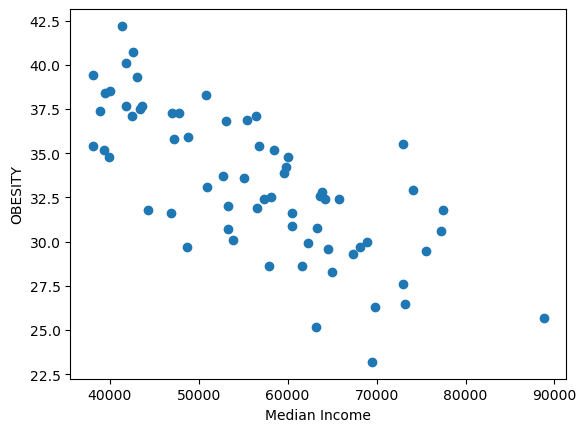

In [6]:
import matplotlib.pyplot as plt
plt.scatter(income_health.Median_income, income_health.OBESITY)
plt.xlabel("Median Income")
plt.ylabel("OBESITY")

In [7]:
pearson_rslt = pearsonr(income_health.Median_income, income_health.OBESITY)

print("Pearson:",pearson_rslt)

Pearson: PearsonRResult(statistic=-0.7343032287316698, pvalue=2.281301199241349e-12)


# Bootstrap confidence interval for correlation coefficients

In [8]:
sample_income_health = income_health.sample(frac=0.3,replace=True)
sample_income_health

,Unnamed: 0,Geo_ID,Name,Median_income,LocationID,ACCESS2,ARTHRITIS,BINGE,CANCER,CASTHMA,...,DIABETES,KIDNEY,LPA,MAMMOUSE,MHLTH,OBESITY,PHLTH,SLEEP,STROKE,TEETHLOST
53,54,12109,"St. Johns County, Florida",88794,12109,15.7,21.0,19.4,6.5,8.3,...,8.1,2.4,20.7,75.3,13.1,25.7,10.4,33.9,2.6,10.4
17,17,12037,"Franklin County, Florida",52679,12037,25.2,23.8,21.6,6.4,9.3,...,11.3,3.2,29.2,69.8,17.4,33.7,15.6,39.7,4.0,22.0
62,63,12127,"Volusia County, Florida",56786,12127,22.3,25.7,19.6,6.4,8.8,...,10.9,2.8,25.8,75.0,15.7,35.4,13.6,40.2,3.3,17.1
50,51,12103,"Pinellas County, Florida",60451,12103,20.0,23.0,20.5,6.5,9.0,...,9.4,2.7,23.6,71.4,14.7,30.9,12.5,38.0,3.0,14.1
8,8,12017,"Citrus County, Florida",48664,12017,22.7,25.5,19.4,6.5,9.4,...,9.5,2.9,30.1,70.1,17.0,29.7,14.8,42.9,3.4,17.8
10,10,12021,"Collier County, Florida",75543,12021,24.9,20.6,17.8,6.3,8.1,...,9.8,2.7,23.6,74.3,13.4,29.5,11.7,34.1,2.9,13.6
17,17,12037,"Franklin County, Florida",52679,12037,25.2,23.8,21.6,6.4,9.3,...,11.3,3.2,29.2,69.8,17.4,33.7,15.6,39.7,4.0,22.0
44,45,12091,"Okaloosa County, Florida",67390,12091,18.9,23.3,19.1,6.4,8.7,...,9.8,2.6,26.1,76.0,14.7,29.3,12.4,39.0,3.0,13.3
5,5,12011,"Broward County, Florida",64522,12011,24.8,20.9,17.0,5.9,8.7,...,11.5,3.0,25.1,74.0,13.6,29.6,12.7,41.3,3.3,14.6
31,31,12065,"Jefferson County, Florida",53080,12065,23.0,24.1,19.3,6.2,9.7,...,12.1,3.1,25.8,73.3,16.2,36.8,14.5,38.7,3.9,19.2


In [9]:
print("Pearson:",pearsonr(sample_income_health.Median_income, sample_income_health.OBESITY))

Pearson: PearsonRResult(statistic=-0.7255411908937816, pvalue=0.00029401508148976265)


In [10]:
#Define a bootstrap function:
np.random.seed(222)
def bootstrap_pearson(sample_income_health):
    
    bootstrap_cor_list = []
    
    for i in range(10000):
        #generate a re-sample with the original sample size, with replacement
        subsample = sample_income_health.sample(len(sample_income_health), replace=True)
        
        #compute correlation
        sample_cor = pearsonr(subsample.Median_income, subsample.OBESITY)[0]

        bootstrap_cor_list.append(sample_cor)
    
    #Get the lower and upper bound for the middle 95%:
    percentile_CI = [np.percentile(bootstrap_cor_list, 2.5), 
          np.percentile(bootstrap_cor_list, 97.5)]
    
    return percentile_CI

In [11]:
bootstrap_pearson(sample_income_health)

[-0.8911144922929389, -0.4022438699829679]

In [12]:
print("95% confidence interval of the Pearson correlation coefficient is:", bootstrap_pearson(sample_income_health))

95% confidence interval of the Pearson correlation coefficient is: [-0.8875378668614041, -0.40953397296364447]


We are 95% confident that the true correlation of Median Income and Obesity in the population is between -0.7839196548862087, -0.26319132913489823.

# Permutation test on the correlation coefficient

In [13]:
small_sample_income_health = income_health.sample(10,random_state=222)
small_sample_income_health

,Unnamed: 0,Geo_ID,Name,Median_income,LocationID,ACCESS2,ARTHRITIS,BINGE,CANCER,CASTHMA,...,DIABETES,KIDNEY,LPA,MAMMOUSE,MHLTH,OBESITY,PHLTH,SLEEP,STROKE,TEETHLOST
63,64,12129,"Wakulla County, Florida",72941,12129,20.5,25.6,21.2,6.5,8.9,...,10.2,2.7,25.9,73.3,15.6,35.5,13.5,38.5,3.3,16.6
60,61,12123,"Taylor County, Florida",43563,12123,27.1,29.1,15.9,6.5,9.8,...,12.5,3.3,33.2,68.6,18.4,37.7,17.1,41.5,4.2,24.3
32,32,12067,"Lafayette County, Florida",56458,12067,28.4,26.9,17.1,6.2,9.5,...,13.0,3.4,32.6,69.2,18.1,37.1,17.3,40.8,4.3,23.8
36,36,12075,"Levy County, Florida",43029,12075,24.7,26.1,16.5,6.4,10.0,...,12.5,3.3,31.6,68.8,18.5,39.3,16.5,40.5,3.9,23.1
40,40,12083,"Marion County, Florida",50808,12083,23.6,27.0,15.9,6.4,9.4,...,11.9,3.0,28.8,74.1,16.8,38.3,14.8,40.1,3.5,18.3
42,43,12087,"Monroe County, Florida",73153,12087,22.3,22.3,21.8,6.2,8.0,...,9.8,2.7,24.6,73.7,13.9,26.5,11.9,38.0,2.9,12.7
65,66,12133,"Washington County, Florida",41806,12133,25.8,29.9,17.3,6.4,10.0,...,12.4,3.3,32.7,72.1,19.4,37.7,17.5,43.4,4.3,25.5
10,10,12021,"Collier County, Florida",75543,12021,24.9,20.6,17.8,6.3,8.1,...,9.8,2.7,23.6,74.3,13.4,29.5,11.7,34.1,2.9,13.6
61,62,12125,"Union County, Florida",55463,12125,27.4,26.8,17.7,6.2,9.4,...,13.2,3.4,33.8,68.0,17.9,36.9,17.5,44.5,4.4,24.6
38,38,12079,"Madison County, Florida",39503,12079,27.0,28.6,15.8,6.3,10.2,...,13.9,3.7,35.2,71.5,18.5,38.4,17.6,41.7,4.8,23.8


Text(0, 0.5, 'Obesity')

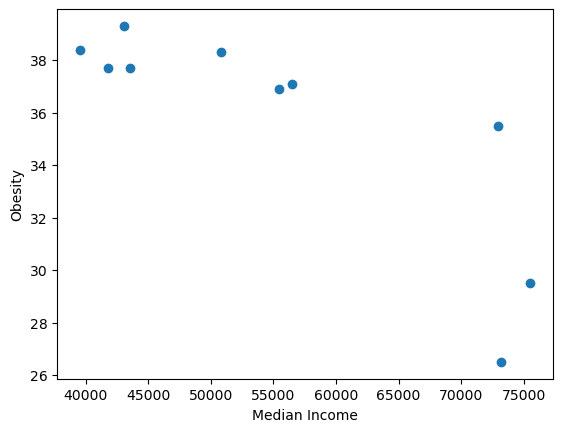

In [14]:
plt.scatter(small_sample_income_health.Median_income, small_sample_income_health.OBESITY)
plt.xlabel("Median Income")
plt.ylabel("Obesity")

## Pearson correlation based on this small sample

In [15]:
pearson_rslt = pearsonr(small_sample_income_health.Median_income, small_sample_income_health.OBESITY)

print("Pearson:",pearson_rslt)

Pearson: PearsonRResult(statistic=-0.8211264190844929, pvalue=0.0035872634304656382)


In [16]:
np.random.permutation(small_sample_income_health.OBESITY)

array([37.1, 26.5, 29.5, 38.4, 37.7, 37.7, 36.9, 39.3, 38.3, 35.5])

## permutation test function for correlation:

In [17]:
def permutation_cor(permu_sample_income_health):
    null_cor_list = []
    
    for i in range(10000):
        # Permutate one variable (OBESITY), while holding the other (Median_income) constant.
        subsample_Y = np.random.permutation(permu_sample_income_health['OBESITY'])
        
        # Compute the Pearson correlation coefficient between Median_income and the permuted OBESITY.
        sample_cor = pearsonr(permu_sample_income_health['Median_income'], subsample_Y)[0]
        
        # Append the computed correlation to the list.
        null_cor_list.append(sample_cor)
    
    return null_cor_list

### the correlation coefficient under the null hypothesis.

In [18]:
null_dist = permutation_cor(small_sample_income_health)

In [19]:
np.sum(np.abs(np.array(null_dist)) >= np.abs(pearson_rslt[0]))

8

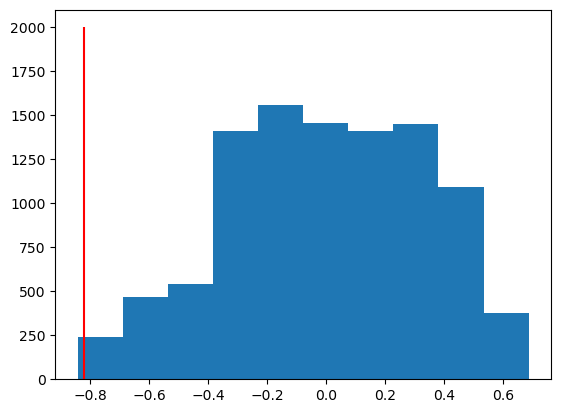

In [20]:
plt.hist(null_dist)

plt.vlines(pearson_rslt[0],ymin=0,ymax=2000,color="red")

In [21]:
import numpy as np
p_sim = np.sum(np.abs(np.array(null_dist)) >= np.abs(pearson_rslt[0]))/10000


In [22]:
print("The simulated p-value (2-tail): ", p_sim)

print("The actual p-value (2-tail) : ", pearson_rslt[1])

The simulated p-value (2-tail):  0.0008
The actual p-value (2-tail) :  0.0035872634304656382


## Comparison and Interpretation:

The simulated p-value of (0.0008) obtained from the permutation test is smaller than the actual p-value (0.0035872634304656382). This indicates that under the null hypothesis of no correlation between the median income and obesity, it's very unlikely to observe a correlation coefficient as extreme as the one observed in the actual data.

Interpretation:

The actual p-value suggests that there is a statistically significant correlation between the median income and obesity at the 0.05 significance level.
The simulated p-value further reinforces this conclusion by indicating that even under the assumption of no correlation (null hypothesis), observing a correlation coefficient as extreme as the one in the actual data is very rare. Thus, it provides additional evidence supporting the rejection of the null hypothesis.